#### Name: Sahitya Mullapudi
#### SID : 011545404
#### Email : sahitya.mullapudi@gmail.com
#### Submission: Assignment2

In [2]:
import pandas as pd
import numpy as np
#import scipy as sp
import scipy.stats as ss
%matplotlib inline 
import matplotlib.pyplot as plt
#from sklearn.utils import shuffle
from sklearn import preprocessing
import tensorflow as tf

In [27]:
'''extracting data for first question'''

data1 = pd.read_csv('ex2data1.csv', header=None, skiprows=1)
#print(data1.shape)
#print(data1)
X= data1.iloc[:, :1]
X_arr = X.values
#print(X_arr)

#print (X)
data1_y = data1.iloc[:, -1]
data1_y = data1_y.values
#print(data1_y)

# normalising data with scikit learn preprocessing library

data1_x = preprocessing.scale(X_arr, axis=0)

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X_arr)
data1_min_x = scaler.transform(X_arr)


In [3]:
#function to split given data into train, validation and test

def split_data(X, val_ratio, test_ratio):
    np.random.seed(1)
    
    #shuffled the points or records
    
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    val_set_size = int(len(X) * val_ratio)
    val_indices = shuffled_indices[test_set_size: test_set_size+val_set_size]
    train_indices = shuffled_indices[test_set_size+val_set_size:]
    return X[train_indices], X[val_indices], X[test_indices]
    

In [49]:
'''extracting data for second question'''


data2 = pd.read_csv('ex2data2.csv', header=None, skiprows=1)
datax2= data2.iloc[:, :1]
X2_arr = datax2.values
data2_y = data2.iloc[:, -1]
data2_y = data2_y.values
# normalising data

data2_scaledX = preprocessing.scale(X2_arr)
#data2_x = np.delete(data2_scaled, -1, axis=1)
#data2_y = data2_scaled[:,-1]

#splitting data into train, test, validation

train_set2x, val_set2x, test_set2x = split_data(data2_scaledX, 0.2, 0.2)
train_set2y, val_set2y, test_set2y = split_data(data2_y, 0.2, 0.2)


C:\Users\sahitya\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [67]:


#min - max normalization from scikit learn , as 16 order values are going to infinity
#used the below data in 2.4 and 2.5

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(datax2)
data2x_min = scaler.transform(datax2)
train_set2xmin, val_set2xmin, test_set2xmin = split_data(data2x_min, 0.2, 0.2)



In [12]:
'''extracting data for third question'''

data3 = pd.read_csv('ex2data3.csv', header=None, skiprows=1)
data3_y = data3.iloc[:, -1]
data3_y = data3_y.values
data3_x = data3.iloc[:, 1:-1]
data3_x = data3_x.values
# normalising data

data3x_scaled = preprocessing.scale(data3_x, axis =0)


#splitting data into train, test, validation

train_set3x, val_set3x, test_set3x = split_data(data3x_scaled, 0.2, 0.2)
train_set3y, val_set3y, test_set3y = split_data(data3_y, 0.2, 0.2)

In [13]:
#calculating gradient for polynomial regression in matrix form

def poly_gradient_matrix(theta, learning_rate, X, y, order):
    new_theta = []
    bias = []
    X_new = np.ones((len(X), order)) + 0.
    for i in range(0, len(X)):
        X_new[i][0] = X[i][0]
        for z in range(1, order):
            #print("in order %s " %z)
            X_new[i][z] = X[i][0] **(z+1)
            
    #appending one column to X data matrix
    
    for i in range (0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias , X_new.T )).T
    WX = X1.dot(theta)
    
    WXminusY = WX-y
    
    transpose1 = (WXminusY).T
    
    # calculating gradient
    
    gradient = (transpose1.dot(X1))*2/len(X1)
    #print("this is gradient %s " %gradient)
    
    # calculating gradient descent
    
    for i in range (0, len(gradient)):
        temp = theta[i] - (learning_rate * gradient[i])
        new_theta.append(temp)
    #print(new_theta)
    return new_theta

In [14]:
# calculating gradient with L2 penalty in matrix form for 16 order

def gradient_matrix_l2(theta, learning_rate, X, y, scale, order):
    bias = []
    new_theta = []
    X_new = np.ones((len(X), order))
    
    # constructing 16 column matrix (can be used for any order)
    
    for i in range(0, len(X)):
        X_new[i][0] = X[i][0]
        for z in range(1, order):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range (0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias , X_new.T )).T
    WX = X1.dot(theta)
    y = y.reshape(len(y), 1)
    WXminusY = WX-y
    transpose = (WXminusY).T
    base_gradient = (transpose.dot(X1))*2/len(X1)
    base_gradient = base_gradient.T
    l2_gradient = scale * theta
    mean_l2_gradient = (l2_gradient)*2/len(X1)
    
    # calculating gradient
    
    gradient = base_gradient + mean_l2_gradient
    
    # calcualting gradient descent
    
    temp =  gradient*learning_rate
    new_theta = theta - temp
    return new_theta

In [15]:
# function to calculate loss for L2 penality (ridge) in matrix form

def cost_matrix_l2(theta, X, y, scale, order):
    bias = []
    new_theta = []
    y = y.reshape(len(y), 1)
    X_new = np.ones((len(X), order))
    for i in range(0, len(X)):
        X_new[i][0] = X[i][0]
        for z in range(1, order):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range (0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias , X_new.T )).T
    WX = X1.dot(theta)
    WXminusY = WX-y
    transpose = (WXminusY).T
    base_loss = transpose.dot(WXminusY)/len(X_new)
    wt = theta.T
    l2_loss = wt.dot(theta)*scale/len(X_new)
    loss = base_loss + l2_loss
    return loss
    

In [16]:
# general function written to calculate gradient for linear regression

def gradient_general(theta, learning_rate, X, y):
    w_gradient = []
    new_theta = []
    bias = []
    for i in range (0, len(X)):
        bias.append(1)
    X1 = np.vstack((bias , X.T )).T
    for i in range (0, len(theta)):
        w_gradient.append(0)
        new_theta.append(0)
    
    #calcualting gradient
    
    for a in range (0, X1.shape[0]):
        temp = 0
        for b in range (0, X1.shape[1]):
            temp += X1[a][b] * theta[b]
        temp = (temp - y[a])*2/X1.shape[0]
        for c in range (0, len(theta)):
            w_gradient[c] += X1[a][c]*temp
            
    # calculating gradient descent
    
    for i in range (0, len(w_gradient)):
        new_theta[i] = theta[i] - (learning_rate * w_gradient[i])
    return new_theta       

In [17]:
#gradient and gradient descent method for polynomial regression from sratch without matrix form 

def poly_gradient_singlex(theta, learning_rate, X, y, order):
    w_gradient = []
    new_theta = []
    X_new = []
    X_new = np.ones((len(X), order))
    for i in range(0, len(X)):
        for j in range(0, order):
            X[i][j] = X[i][0]**(order+1)
            X_new[i][j].append(0)
        X_new[i][0] = X[i][0]
        for z in range(1, order):
            X_new[i][z] = X_new[i][0] **(z+1)
    bias = []
    for i in range (0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias , X_new.T )).T
    for i in range (0, len(theta)):
        w_gradient.append(0)
        new_theta.append(0)
        
    # calcualting gradient
    
    for a in range (0, X1.shape[0]):
        temp = 0
        for b in range (0, X1.shape[1]):
            temp += X1[a][b] * theta[b]
        temp = (temp - y[a])*2/X1.shape[0]
        for c in range (0, len(theta)):
            w_gradient[c] += X1[a][c]*temp
            
    # calculatig gradient descent
    
    for i in range (0, len(w_gradient)):
        new_theta[i] = theta[i] - (learning_rate * w_gradient[i])
    return new_theta    

In [18]:
# general function written to calculate MSE for linear regression

def cost_General(theta, X, y):
    error = 0
    bias = []
    for i in range (0, len(X)):
        bias.append(1)
    X1 = np.vstack((bias , X.T )).T
    for i in range (0, len(X1)):
        thetaXx = 0
        for j in range (0, X1.shape[1]):
            thetaXx += theta[j] * X1[i][j]
        error += (thetaXx - y[i])**2
    return error/len(X)   

In [19]:
#loss function for ridge regression

def poly_cost_Ridge(theta, X, y, alpha):
    error = 0
    total = 0
    bias = []
    for i in range (0, len(X)):
        bias.append(1)
    X1 = np.vstack((bias , X.T )).T
    for i in range (0, len(X1)):
        thetaXx = 0
        for j in range (0, X1.shape[1]):
            thetaXx += theta[j] * X1[i][j]
        total += (thetaXx - y[i])**2
    temp = 0
    for i in range(0, len(theta)):
        temp += theta[i]**2
    extra = temp * alpha / len(X)
    error = total + extra
    return error/len(X) 

In [20]:
#function to calculate cost when there is one x and one y and can be used for any polynomial order

def poly_cost_singlex(theta, X, y, order):
    error = 0
    bias = []
    X_new = np.ones((len(X), order))
    for i in range(0, len(X)):
        X_new[i][0] = X[i][0]
        for z in range(1, order):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range(0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias, X_new.T)).T
    for i in range (0, len(X1)):
        thetaXx = 0
        for z in range (0, X1.shape[1]):
            thetaXx += theta[z] * X1[i][z]
        error += (thetaXx - y[i])**2
    return error/len(X)

In [262]:
#question 1.1
#linear regression 1st order 

def LRmodel_1_1():
    
    learning_rate = 0.1
    new_cost = 0
    theta = []
    for i in range(0, data1_x.shape[1]+1):
        theta.append(0)
    old_cost = cost_General(theta, data1_x, data1_y)
    count = 0
    
    # rather than iterations, i iterate till the new_cost< old_cost
    
    while (new_cost < old_cost):
        if (count > 0):
            old_cost = new_cost
            theta = theta_new
            
        # calculating gradietn descent for linear regression
        
        theta_new = gradient_general(theta, learning_rate, data1_x, data1_y)
        new_cost = cost_General(theta_new, data1_x, data1_y)
        count += 1
    RMSE = np.sqrt(old_cost)
    print("First Question - 1 -1 : Linear Regression using matrix")
    print("RMSE after optimization is  %s" % (RMSE))
    print("weights after optimization is %s " % (theta) )
    
    # predcting new y
    
    new_y = []
    
    data1_xsort= sorted(data1_x)    
    for i in range(0, len(data1)):
        y = theta[0] + theta[1]*data1_xsort[i][0]
        new_y.append(y)
        
    #plotting points wth fitted line
    
    #plt.scatter(data1_x, data1_y)
    plt.scatter(data1_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

First Question - 1 -1 : Linear Regression using matrix
RMSE after optimization is  0.47624021947640593
weights after optimization is [0.452691499435375, -0.3262193533556662] 


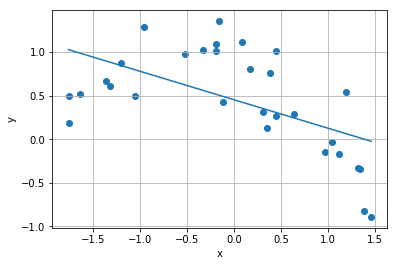

In [263]:
#question 1.1
#linear regression 1st order 

LRmodel_1_1()

In [21]:
#function to construct polynomial equation

def constructequation(order, x, y, learning_rate):
    new_cost = 0
    theta = []
    for i in range(0, order+1):
        theta.append(0)
    old_cost = cost_General(theta, x, y)
    count = 0
    while (new_cost <= old_cost):
    #while (count < 100000):
        if (count > 0):
            old_cost = new_cost
            theta = theta_new
        
        
        #matix form gradient calculation function
        
        theta_new = poly_gradient_matrix(theta, learning_rate, x, y, order)
        
        # calculating error 
        
        new_cost = poly_cost_singlex(theta_new, x, y, order)

        count += 1
    RMSE = np.sqrt(old_cost)
    return [RMSE, theta]   

In [214]:
#2nd order polynomial regression (matrix form)

def PR_2order_1_2():
    learning_rate = 0.00006

    #construct equation function () is a generic function for all the orders
    
    [RMSE, theta] = constructequation(2, data1_x, data1_y, learning_rate)
    print("First Question - 1 -2 : Ploynomial Regression second order")
    print("RMSE after optimization is  %s" % (RMSE))
    print("weights after optimization is %s " % (theta) )
    new_y = []

    #sorting X data, so that the graph will not be zig zag and calculating new y
    
    
        
    data1_xsort= sorted(data1_x)
    #data1_xsort= X_arr
    for i in range(0, len(data1_x)):
        y = theta[0] + theta[1]*data1_xsort[i][0] + theta[2]*data1_xsort[i][0]**2
        new_y.append(y)
    
    
    plt.scatter(data1_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    

First Question - 1 -2 : Ploynomial Regression second order
RMSE after optimization is  0.28569929469867283
weights after optimization is [0.8653297591828175, -0.43902889671322864, -0.41263869732605973] 
[ 1.29159857  1.01565071  0.18761925  0.27172331 -0.82225083  0.6119122
  0.31102869  0.13468115  1.01832094  0.80417093  0.76418386  0.49776075
 -0.17312004  0.977159    0.42245355  0.87390471  0.67250003  0.54039819
 -0.03212325  0.29018234  1.35232236 -0.32672638  1.11901923 -0.14123441
 -0.3377481   0.49908483  0.51777371  1.03021295 -0.88886022  1.09914721]
[0.35383488194114987, 0.3611944073683262, 0.4698295928215528, 0.6974935616714613, 0.7244107064312777, 0.7920465601157356, 0.8663198160482781, 0.9054233531360409, 0.9820858130549298, 0.9659864969106563, 0.9353644098577291, 0.9344208155456979, 0.9267632190726381, 0.9129687567833821, 0.826401378650785, 0.7812243889772289, 0.692945088119967, 0.6611384500056503, 0.6344666607648224, 0.5920740579663305, 0.5869468512219556, 0.4179346252

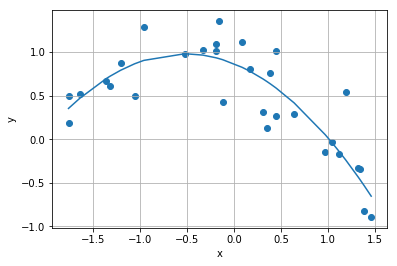

In [215]:
# question - 1.2
# function to compute weights and RMSE for 2nd order ploynomial regression

PR_2order_1_2()

In [218]:
# question - 1.3
#4th order polynomial regression (matrix form)

def PR_4order_1_3():
    learning_rate = 0.001
    
    # gradient and rmse are calculated in the below function
    
    [RMSE, theta] = constructequation(4, data1_x, data1_y, learning_rate)
    print("First Question - 1 -3 : Ploynomial Regression fourth order")
    print("RMSE after optimization is  %s" % (RMSE))
    print("weights after optimization is %s " % (theta) )
    
    #sorting X data, so that the graph will not be zig zag and calculating new y
    
    new_y = []
    
        
    data1_xsort= sorted(data1_x)
    for i in range(0, len(data1_xsort)):
        y = theta[0] + theta[1]*data1_xsort[i][0] + theta[2]*data1_xsort[i][0]**2 + theta[3]*data1_xsort[i][0]**3 + theta[4]*data1_xsort[i][0]**4
        new_y.append(y)

    #plotting points and fitted line
    
    plt.scatter(data1_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

First Question - 1 -3 : Ploynomial Regression fourth order
RMSE after optimization is  0.2851812005367584
weights after optimization is [0.8536750905179186, -0.456501198642671, -0.3635769931074584, 0.0052599233928051015, -0.018661904633786454] 


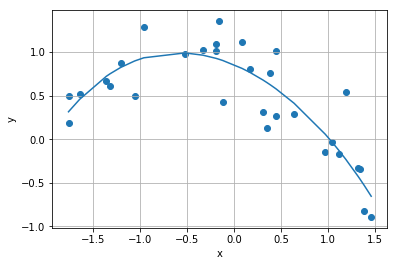

In [219]:
# question - 1.3
# function to compute weights and RMSE for 4th order ploynomial regression

PR_4order_1_3()

In [41]:
# question - 1.4
#16th order polynomial regression (matrix form)
    
def PR_16order_1_4():
    learning_rate = 0.1
    new_cost = 0
    theta = []
    #theta = np.array(list, dtype=np.float64)
    order = 16
    for i in range(0, order+1):
        theta.append(0)
    
    count = 0
    while (count < 10000):
        if (count > 0):
            theta = theta_new
            
        # optimizing weights through gradient method
        #print("in while loop %s" %count)
        theta_new = poly_gradient_matrix(theta, learning_rate, data1_min_x, data1_y, 16)
        #print("this is theta_new 16 %s" %theta_new[16])
        
        
        count += 1
        
    #calculating error
    
    new_cost = poly_cost_singlex(theta_new, data1_min_x, data1_y, order)
    RMSE = np.sqrt(new_cost)
    print("First Question - 1 -4 : Ploynomial Regression 16 order")
    print("RMSE after optimization is  %s" % (RMSE))
    print("weights after optimization is %s " % (theta) )
    
    #sorting X data, so that the graph will not be zig zag and calculating new y
    
    new_y = []
    data1_xsort= sorted(data1_min_x)
    for i in range(0, len(data1_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*(data1_xsort[i][0])**j 
        new_y.append(y)
        
    #plotting points and fitted line
    
    plt.scatter(data1_min_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    

First Question - 1 -4 : Ploynomial Regression 16 order
RMSE after optimization is  0.2671217849705294
weights after optimization is [0.3812596116952017, 2.7466826872580987, -1.8630953139483386, -2.2329185111751912, -1.3556323025632144, -0.3613274754302036, 0.3968820610603686, 0.8544959548445582, 1.0444581908017319, 1.0244752919218914, 0.8508662030126489, 0.5706158444560496, 0.22031738251158306, -0.17254934652412054, -0.5877972038494261, -1.0108240318048536, -1.4312092410037405] 


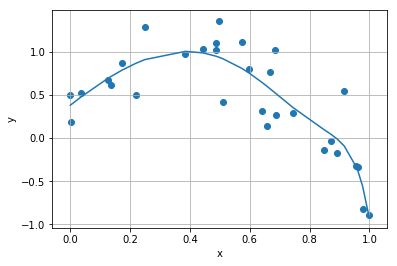

In [42]:
# question - 1.4
# function to compute weights and RMSE for 16th order ploynomial regression

PR_16order_1_4()

In [43]:
# question - 1.5
# L2 penalty ridge regression - 16 order

def l2penalty_1_5():
    learning_rate = 0.1
    new_cost = 0
    theta = []
    order = 16
    scale = 0.01
    theta = np.array(range(order+1)).reshape((order+1, 1))
    count = 0
    while (count < 10000):
        if (count > 0):
            theta = theta_new
        
        # calculating gradient matrix with l2 penalty
        
        theta_new = gradient_matrix_l2(theta, learning_rate, data1_min_x, data1_y, scale, order)
        count += 1
        
    # calculating loss 
    
    new_cost = cost_matrix_l2(theta_new, data1_min_x, data1_y, scale, order)
    
    # calculating RMSE
    
    theta_t = theta_new.reshape(order+1,)
    error = poly_cost_singlex(theta_t, data1_min_x, data1_y, order)
    RMSE = np.sqrt(error)
    print("First Question - 1 -5 : Ploynomial Regression 16 order L2 penalty")
    print("RMSE after optimization is  %s" % (RMSE))
    print("weights after optimization is %s " % (theta_new) )
    
    #sorting X data, so that the graph will not be zig zag and calculating new y
    
    new_y = []
    
        
    data1_xsort= sorted(data1_min_x)
    for i in range(0, len(data1_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta_new[j][0]*(data1_xsort[i][0])**j 
        new_y.append(y)
        
    #plotting points and fitted line
    
    
    plt.scatter(data1_min_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    

First Question - 1 -5 : Ploynomial Regression 16 order L2 penalty
RMSE after optimization is  0.27613668149773896
weights after optimization is [[ 0.4422552 ]
 [ 2.21825374]
 [-1.54786849]
 [-1.71092067]
 [-0.96500437]
 [-0.21440848]
 [ 0.30142289]
 [ 0.56783929]
 [ 0.63600084]
 [ 0.5668704 ]
 [ 0.41328421]
 [ 0.21601284]
 [ 0.00463545]
 [-0.20027619]
 [-0.38494016]
 [-0.54051079]
 [-0.66165082]] 


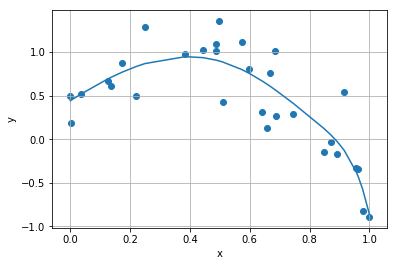

In [44]:
# question - 1.5
# L2 penalty ridge regression

l2penalty_1_5()

In [47]:
# question - 1.6
#16th order polynomial regression using sckit-learn Ridge

def PR_16_order_sklearnRidge_1_6():
    bias = []
    from sklearn.linear_model import Ridge
    
    # fitting data with scikit learn ridge regression model
    
    ridgereg = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, random_state=None, solver='auto')
    X_new = np.ones((len(data1_x), 16))
    for i in range(0, len(data1_x)):
        X_new[i][0] = data1_x[i][0]
        for z in range(1, 16):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range(0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias, X_new.T)).T
    ridgereg.fit(X1, data1_y)
    predict_y = ridgereg.predict(X1)
    from sklearn.metrics import mean_squared_error
    
    # coefficients
    
    theta = ridgereg.coef_
    
    # calculating RMSE using scikit learn
    
    error = mean_squared_error(data1_y, predict_y)
    RMSE = np.sqrt(error)
    
    # calcualting error with function from scratch
    
    errormy = poly_cost_singlex(theta, data1_x, data1_y, 16)
    RMSEmy = np.sqrt(RMSE)
    print("First Question - 1 -6 : Ploynomial Regression 16 order using sklearn Ridge")
    print("RMSE after optimization is  %s " %RMSE)
    #print("RMSE after optimization is  %s" % (RMSEmy))
    print("weights after optimization is %s " % (theta) )
    
    #sorting X data, so that the graph will not be zig zag and calculating new y
    
    new_y = []
    
        
    data1_xsort= sorted(data1_x)
    for i in range(0, len(data1_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*((data1_xsort[i][0])**j )
        new_y.append(y)
    
        
    #plotting points and fitted line
    
    plt.scatter(data1_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()  

First Question - 1 -6 : Ploynomial Regression 16 order using sklearn Ridge
RMSE after optimization is  0.2622596483128262 
weights after optimization is [ 0.         -0.46184238 -0.20685956 -0.11722669 -0.11557662  0.02270524
 -0.03953872  0.10750208  0.02649076  0.11441138  0.06329738  0.01432632
  0.03450359 -0.12859381 -0.07983074  0.04038572  0.02297895] 


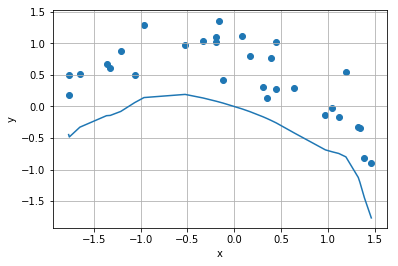

In [48]:
# question - 1.6
# function to compute weights and RMSE for 16th order ploynomial regression using scikit-learn Ridge
''' i have tried with alpha as 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001'''

PR_16_order_sklearnRidge_1_6()

In [152]:
# question - 1.7
#16th order polynomial regression using sckit-learn Lasso

def PR_16_order_sklearnLasso_1_7():
    bias = []
    from sklearn.linear_model import Lasso
    
    #fitting data with scikit learn lasso regression model
    
    lassoreg = Lasso(alpha=0.00001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False)
    X_new = np.ones((len(data1_x), 16))
    for i in range(0, len(data1_x)):
        X_new[i][0] = data1_x[i][0]
        for z in range(1, 16):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range(0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias, X_new.T)).T
    lassoreg.fit(X1, data1_y)
    predict_y = lassoreg.predict(X1)
    from sklearn.metrics import mean_squared_error
    
    #weights using lasso
    
    theta = lassoreg.coef_
    
    #error calculated using mean_sqaure_error function in scikit-learn
    
    error = mean_squared_error(data1_y, predict_y)
    RMSE = np.sqrt(error)
    
    #to calculate cost using my function poly_cost_single_x()
    
    errormy = poly_cost_singlex(theta, data1_x, data1_y, 16)
    RMSEmy = np.sqrt(RMSE)
    
    #printing the weights and RMSE
    
    print("First Question - 1 -6 : Ploynomial Regression 16 order using sklearn Lasso ")
    print("RMSE after optimization with is  %s" % (RMSE))
    
    print("weights after optimization is %s " % (theta) )
    
    #calculating new y or y' and sorting X data so that the graph is not zig zag
    
    new_y = []
    
        
    data1_xsort= sorted(data1_x)
    for i in range(0, len(data1_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*(data1_xsort[i][0])**j 
            #y= -y
        new_y.append(y)
        
    #plotting the graph with fitted line
    
    plt.scatter(data1_x, data1_y)
    plt.plot(data1_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

First Question - 1 -6 : Ploynomial Regression 16 order using sklearn Lasso 
RMSE after optimization with is  0.2611944045781847
weights after optimization is [ 0.00000000e+00 -7.60071683e-01 -6.49249672e-01  2.19860549e-01
  2.17706455e-01  2.25496145e-01  7.61300610e-02 -6.93888516e-02
 -3.90398208e-02 -3.26688799e-02 -1.66435483e-02 -4.96623724e-03
 -2.31154724e-03  9.31886679e-04  5.45484119e-04  9.30476923e-04
  4.95349438e-04] 


C:\Users\sahitya\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


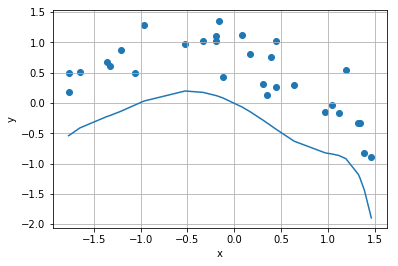

In [153]:
#optimized
# question - 1.7
# function to compute weights and RMSE for 16th order ploynomial regression using scikit-learn Lasso
''' i have tried with alpha as 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001'''

PR_16_order_sklearnLasso_1_7()

In [52]:
#question 2.1
#linear regression 1st order 


def LRmodel_2_1():
    
    learning_rate = 0.01
    new_cost = 0
    theta = []
    for i in range(0, train_set2x.shape[1]+1):
        theta.append(0)
    old_cost = cost_General(theta, train_set2x, train_set2y)
    count = 0
    while (new_cost < old_cost):
        if (count > 0):
            old_cost = new_cost
            theta = theta_new
        
        theta_new = gradient_general(theta, learning_rate, train_set2x, train_set2y)
        new_cost = cost_General(theta_new, train_set2x, train_set2y)
        #theta = theta_new
        count += 1
    
    # calculating cost and RMSE for test and train sets
    
    RMSE_train = np.sqrt(old_cost)
    cost_test = cost_General(theta, test_set2x, test_set2y)
    RMSE_test = np.sqrt(cost_test)
    print("Second Question - 2 -1 : Linear Regression using matrix")
    print("Train Set : RMSE after optimization is  %s" % (RMSE_train))
    print("Test Set : RMSE after optimization is  %s" % (RMSE_train))
    print("weights after optimization is %s " % (theta) )
    
    # sorting X data so that graph is not zig zag and calculating y'
    
    new_y = []
    train_set2x_sort= sorted(train_set2x)
    for i in range(0, len(train_set2x_sort)):
        y = theta[0] + theta[1]*train_set2x_sort[i]
        new_y.append(y)
        
    # plotting data with fitted line
    
    plt.scatter(train_set2x, train_set2y)
    plt.plot(train_set2x_sort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Second Question - 2 -1 : Linear Regression using matrix
Train Set : RMSE after optimization is  260409.20636592258
Test Set : RMSE after optimization is  260409.20636592258
weights after optimization is [547164.1203385042, 268475.5933491865] 


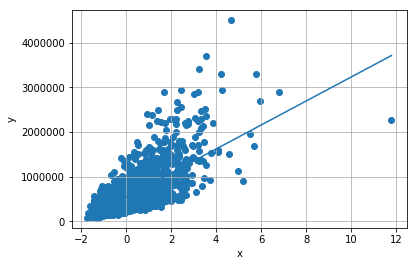

In [53]:
#question 2.1
#linear regression 1st order 

LRmodel_2_1()

In [59]:
#question 2.2
#2nd order polynomial regression (matrix form)

def PR_2order_2_2():
    learning_rate = 0.001

    #construct equation function () is a generic function for all the orders
    [RMSE_train, theta] = constructequation(2, train_set2x, train_set2y, learning_rate)
    
    # calculating error and RMSE for test set
    
    error_test = poly_cost_singlex(theta, test_set2x, test_set2y, 2)
    RMSE_test = np.sqrt(error_test)
    print("Second Question - 2 -2 : Ploynomial Regression second order")
    print("Train Set : RMSE after optimization is  %s" % (RMSE_train))
    print("Test Set : RMSE after optimization is  %s" % (RMSE_test))
    print("weights after optimization is %s " % (theta) )
    
    # sorting X data so that graph is not zig zag and calculating y'
    
    new_y = []
    train_set2xsort= sorted(train_set2x)
    for i in range(0, len(train_set2x)):
        y = theta[0] + theta[1]*train_set2xsort[i][0] + theta[2]*train_set2xsort[i][0]**2
        new_y.append(y)
        
    # plotting data with fitted line
    
    plt.scatter(train_set2x, train_set2y)
    plt.plot(train_set2xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    

Second Question - 2 -2 : Ploynomial Regression second order
Train Set : RMSE after optimization is  259719.87512706892
Test Set : RMSE after optimization is  260786.04513335458
weights after optimization is [540362.3320293705, 255679.33532140832, 6869.623725164777] 


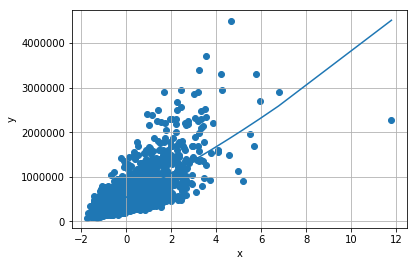

In [60]:
#question 2.2
#2nd order polynomial regression (matrix form)

PR_2order_2_2()

In [132]:
# question - 2.3
#4th order polynomial regression (matrix form)

def PR_4order_2_3():
    learning_rate = 0.01
    theta = []

    order = 4
    for i in range(0, order+1):
        theta.append(0)
    count = 0
    while (count < 30000):
        if (count > 0):
            theta = theta_new
        theta_new = poly_gradient_matrix(theta, learning_rate, train_set2xmin, train_set2y, 4)
        count += 1
    
    # calculating error and RMSE for test set and train set
    
    new_cost = poly_cost_singlex(theta_new, train_set2xmin, train_set2y, order)
    RMSE_train = np.sqrt(new_cost)
    test_error = poly_cost_singlex(theta_new, test_set2xmin, test_set2y, order)
    RMSE_test = np.sqrt(test_error)

    print("Second Question - 2 -3 : Ploynomial Regression fourth order")
    print("Train Set : RMSE after optimization is  %s" % (RMSE_train))
    print("Test Set : RMSE after optimization is  %s" % (RMSE_test))
    print("weights after optimization is %s " % (theta) )
    
    # sorting X data so that graph is not zig zag and calculating y'
    
    new_y = []
    train_set2xsort= sorted(train_set2xmin)
    for i in range(0, len(train_set2xsort)):
        y = theta[0] + theta[1]*train_set2xsort[i][0] + theta[2]*train_set2xsort[i][0]**2 + theta[3]*train_set2xsort[i][0]**3 + theta[4]*train_set2xsort[i][0]**4
        new_y.append(y)

    # plotting data with fitted line
    
    plt.scatter(train_set2xmin, train_set2y)
    plt.plot(train_set2xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Second Question - 2 -3 : Ploynomial Regression fourth order
Train Set : RMSE after optimization is  260103.59372267232
Test Set : RMSE after optimization is  261140.9123097659
weights after optimization is [136937.03495407375, 3023847.4972480927, 1178367.1061847168, 289448.2155414665, -52374.404557940434] 


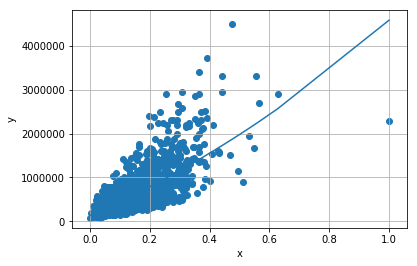

In [133]:
#question 2.3
#4th order polynomial regression (matrix form)

PR_4order_2_3()

In [74]:
# question - 2.4
#16th order polynomial regression (matrix form)
# i tried min-max normalization for this problem
    
def PR_16order_2_4():
    learning_rate = 0.01
    new_cost = 0
    theta = []
    order = 16
    for i in range(0, order+1):
        theta.append(0)
    count = 0
    while (count < 8000):
        if (count > 0):
            theta = theta_new
        
        theta_new = poly_gradient_matrix(theta, learning_rate, train_set2xmin, train_set2y, 16)
        
        count += 1
     
    #calculating error and RMSE for train set and test set
    
    new_cost = poly_cost_singlex(theta_new, train_set2xmin, train_set2y, order)
    RMSE_train = np.sqrt(new_cost)
    cost_test = poly_cost_singlex(theta_new, test_set2xmin, test_set2y, order)
    RMSE_test = np.sqrt(cost_test)


    print("First Question - 1 -4 : Ploynomial Regression 16 order")
    print("Train Set : RMSE after optimization is  %s" % (RMSE_train))
    print("Test Set : RMSE after optimization is  %s" % (RMSE_test))
    print("weights after optimization is %s " % (theta))
    
    #calculating new y or y'
    
    new_y = []
    train_set2xsort= sorted(train_set2xmin)
    for i in range(0, len(train_set2xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*(train_set2xsort[i][0])**j 
        new_y.append(y)
        
    # plotting data with fitted line
    
    plt.scatter(train_set2xmin, train_set2y)
    plt.plot(train_set2xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


First Question - 1 -4 : Ploynomial Regression 16 order
Train Set : RMSE after optimization is  276956.3807159252
Test Set : RMSE after optimization is  283985.37927244883
weights after optimization is [278589.9632944171, 1984597.3583783535, 784319.3426448249, 285249.0275340022, 107052.98881108123, 41078.681647238955, 14781.34530459076, 3444.2697973448976, -1805.6314422877715, -4388.061173245576, -5721.578981218712, -6436.783177869494, -6831.708220031568, -7054.703913872507, -7182.805938873443, -7257.391505547572, -7301.283884118329] 


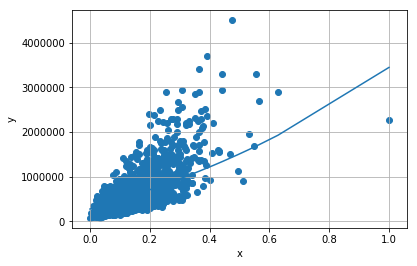

In [75]:
# question - 2.4
#16th order polynomial regression (matrix form)
#i tried min-max normalization for this problem
    
PR_16order_2_4()

In [136]:
''' question 2.5 - L2 penalty '''
''' I tried min max normalization for this problem '''

def l2penalty_2_5():
    learning_rate = 0.01
    new_cost = 0
    theta = []
    order = 16
    scale = 0.1
    theta = np.array(range(order+1)).reshape((order+1, 1))
    count = 0
    while (count < 10000):
        if (count > 0):
            theta = theta_new
        
        # l2 penalty - gradient matrix function call
        
        theta_new = gradient_matrix_l2(theta, learning_rate, train_set2xmin, train_set2y, scale, order)
        count += 1
    
    #train set : cost calculated using l2 penalty matrix form
    
    new_cost = cost_matrix_l2(theta_new, train_set2xmin, train_set2y, scale, order)
    
    error = poly_cost_singlex(theta_new, train_set2xmin, train_set2y, 16)
    RMSE_train = np.sqrt(error)
    error_val = poly_cost_singlex(theta_new, val_set2xmin, val_set2y, 16)
    RMSE_val = np.sqrt(error_val)
    test_cost = poly_cost_singlex(theta_new, test_set2xmin, test_set2y, 16)
    RMSE_test = np.sqrt(test_cost)
    print("Second Question - 2 -5 : 16 order l2 penalty")
    print("Train Set : RMSE after optimization is  %s" % (RMSE_train))
    print("Test Set : RMSE after optimization is  %s" % (RMSE_test))
    print("Validation Set: RMSE after optimization is %s" %(RMSE_val))
    print("weights after optimization is %s " % (theta_new) )
    
    # predicting y
    
    new_y = []
    train_set2xsort= sorted(train_set2xmin)
    for i in range(0, len(train_set2xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta_new[j]*(train_set2xsort[i][0])**j 
        new_y.append(y)
        
    #plotting points of data
    
    plt.scatter(train_set2xmin, train_set2y)
    plt.plot(train_set2xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("fitted line in Training Set")
    plt.grid(True)
    plt.show()
    
      
    #for different L2 penalty values calculating weight coefficients
    
    scales = [10000, 5000, 100, 0.01, 0.00001]
    coefs = []
    for a in scales:
        theta_new1 = np.array(range(order+1)).reshape((order+1, 1))
        theta = np.array(range(order+1)).reshape((order+1, 1))
        while (count < 10000):
            if (count > 0):
                theta = theta_new1
            theta_new1 = gradient_matrix_l2(theta, learning_rate, train_set2x, train_set2y, a, order)
            count += 1
             
        coefs.append(theta_new1.reshape(17, ))
        
    #plotting weight coefficients as a function of L2 penality
    
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('scale')
    plt.ylabel('weights')
    plt.title('weight coefficients as a function of the L2 penality ')
    plt.axis('tight')
    
   
    

Second Question - 2 -5 : 16 order l2 penalty
Train Set : RMSE after optimization is  [270324.43500319]
Test Set : RMSE after optimization is  [276323.86009426]
weights after optimization is [[ 245728.70211674]
 [2223868.72930249]
 [ 879463.33353776]
 [ 312490.7978809 ]
 [ 108611.32524704]
 [  32879.1256942 ]
 [   2668.82794621]
 [ -10345.21407826]
 [ -16362.56228428]
 [ -19317.43743415]
 [ -20840.78379832]
 [ -21656.54490071]
 [ -22106.27230542]
 [ -22359.69705027]
 [ -22504.84072083]
 [ -22588.93667887]
 [ -22638.02321928]] 


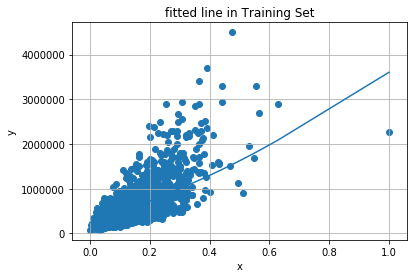

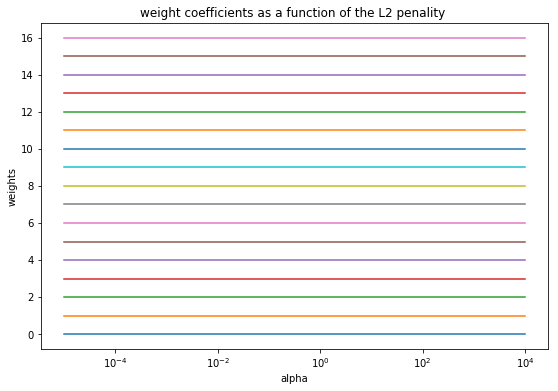

In [137]:
''' question 2.5 - L2 penalty '''
''' i tried min-max normalization for this problem '''
''' I tried many lambdas for weights. but the weight coefficient graph is just giving straight lines'''

l2penalty_2_5()

In [138]:
# question - 2.6
#16th order polynomial regression using sckit-learn Ridge

def PR_16_order_sklearnRidge_2_6():
    bias = []
    bias1 = []
    bias2 = []
    from sklearn.linear_model import Ridge
    rate = 15
    
    #fitting data into ridge function
    
    ridgereg = Ridge(alpha=rate , copy_X=True, fit_intercept=True, max_iter=500000,
      normalize=False, random_state=None, solver='auto')
    X_new = np.ones((len(train_set2x), 16))
    for i in range(0, len(train_set2x)):
        X_new[i][0] = train_set2x[i][0]
        for z in range(1, 16):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range(0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias, X_new.T)).T
    ridgereg.fit(X1, train_set2y)
    test_x_new = np.ones((len(test_set2x), 16))
    for i in range(0, len(test_set2x)):
        test_x_new[i][0] = test_set2x[i][0]
        for z in range(1, 16):
            test_x_new[i][z] = test_x_new[i][0] **(z+1)
    for i in range(0, len(test_x_new)):
        bias1.append(1)
    X1_test = np.vstack((bias1, test_x_new.T)).T
    
    val_x_new = np.ones((len(val_set2x), 16))
    for i in range(0, len(val_set2x)):
        val_x_new[i][0] = val_set2x[i][0]
        for z in range(1, 16):
            val_x_new[i][z] = val_x_new[i][0] **(z+1)
    for i in range(0, len(val_x_new)):
        bias2.append(1)
    X1_val = np.vstack((bias2, val_x_new.T)).T
    
    # predicting y
    
    predict_y = ridgereg.predict(X1)
    predict_y_test = ridgereg.predict(X1_test)
    predict_y_val = ridgereg.predict(X1_val)
    from sklearn.metrics import mean_squared_error
    theta = ridgereg.coef_
    
    # calculating cost 
    errormy = mean_squared_error(train_set2y, predict_y)
    RMSEmy = np.sqrt(errormy)
    error_test = mean_squared_error(test_set2y, predict_y_test)
    RMSEtest = np.sqrt(error_test)
    error_val = mean_squared_error(val_set2y, predict_y_val)
    RMSEval = np.sqrt(error_val)
    error = poly_cost_singlex(theta, train_set2x, train_set2y, 16)
    RMSE = np.sqrt(error)
    print("Second Question - 2 -6 : Ploynomial Regression 16 order using sklearn Ridge")
    print("Train Set : RMSE after optimization is  %s" % (RMSEmy))
    print("Test Set : RMSE after optimization is  %s" % (RMSEtest))
    print("Validation Set : RMSE after optimization is  %s" % (RMSEval))
    
    print("weights after optimization is %s " % (theta) )
    
    # calculating coefficients for different values of penalty
    
    alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    coefs = []
    errors = []
    for a in alphas:
        ridgereg = Ridge(alpha=a, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, random_state=None, solver='auto')
        ridgereg.fit(X1, train_set2y)
        predict_y = ridgereg.predict(X1)
        coefs.append(ridgereg.coef_)
        
    # predicting new y based on optimized weights
    
    new_y = []
    data2_xsort= sorted(train_set2x)
    for i in range(0, len(data2_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*(data2_xsort[i][0])**j 
        new_y.append(y)
    
    #plotting data
    
    plt.scatter(train_set2x, train_set2y)
    plt.plot(data2_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Fitting the line for Training Set')
    plt.grid(True)
    plt.show()  
    
    
    
    # plotting weight coefficients as a function of L2 penalty
    
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('weight coefficients as a function of the L2 penality ')
    plt.axis('tight')

Second Question - 2 -6 : Ploynomial Regression 16 order using sklearn Ridge
Train Set : RMSE after optimization is  267183.98987287504
Test Set : RMSE after optimization is  260093.54331745152
Validation Set : RMSE after optimization is  45189528432.83295
weights after optimization is [ 0.00000000e+00  2.22691609e+05  5.48247107e+04  4.13556159e+04
  3.57805933e+04 -3.28648195e+04 -6.55350607e+04  3.90712924e+04
  2.28148540e+04 -2.11023093e+04  1.92165518e+03  2.97082966e+03
 -1.39195609e+03  2.90120374e+02 -3.26960105e+01  1.92891946e+00
 -4.65360394e-02] 


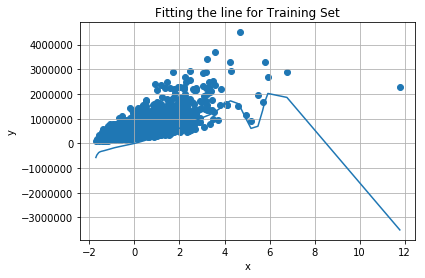

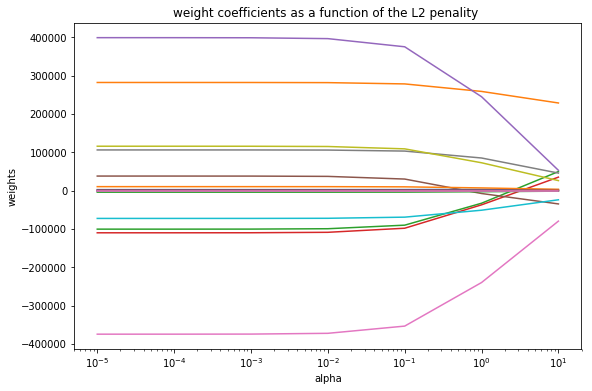

In [139]:
# question - 2.6
#16th order polynomial regression using sckit-learn Ridge
''' i have tried with alpha as 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001'''

PR_16_order_sklearnRidge_2_6()

In [150]:
# question - 2.7
#16th order polynomial regression using sckit-learn Lasso

def PR_16_order_sklearnLasso_2_7():
    bias = []
    bias2 = []
    rate = 0.1
    from sklearn.linear_model import Lasso
    lassoreg = Lasso(alpha=rate, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False)
    X_new = np.ones((len(train_set2x), 16))
    for i in range(0, len(train_set2x)):
        X_new[i][0] = train_set2x[i][0]
        for z in range(1, 16):
            X_new[i][z] = X_new[i][0] **(z+1)
    for i in range(0, len(X_new)):
        bias.append(1)
    X1 = np.vstack((bias, X_new.T)).T
    lassoreg.fit(X1, train_set2y)
    predict_y = lassoreg.predict(X1)
    
    Xtest_new = np.ones((len(test_set2x), 16))
    for i in range(0, len(test_set2x)):
        Xtest_new[i][0] = test_set2x[i][0]
        for z in range(1, 16):
            Xtest_new[i][z] = Xtest_new[i][0] **(z+1)
    for i in range(0, len(Xtest_new)):
        bias2.append(1)
    X1_test = np.vstack((bias2, Xtest_new.T)).T
    predict_test_y = lassoreg.predict(X1_test)
    from sklearn.metrics import mean_squared_error
    
    bias3 = []
    Xval_new = np.ones((len(val_set2x), 16))
    for i in range(0, len(val_set2x)):
        Xval_new[i][0] = val_set2x[i][0]
        for z in range(1, 16):
            Xval_new[i][z] = Xval_new[i][0] **(z+1)
    for i in range(0, len(Xval_new)):
        bias3.append(1)
    X1_val = np.vstack((bias3, Xval_new.T)).T
    predict_val_y = lassoreg.predict(X1_val)
    
    
    
    #weights using lasso
    
    theta = lassoreg.coef_
    
    errormy = mean_squared_error(train_set2y, predict_y)
    RMSEmy = np.sqrt(errormy)
    errortest = mean_squared_error(test_set2y, predict_test_y)
    RMSE_test = np.sqrt(errortest)
    errorval = mean_squared_error(val_set2y, predict_val_y)
    RMSE_val = np.sqrt(errorval)
    
    #to calculate cost using my function poly_cost_single_x()
    
    error = poly_cost_singlex(theta, train_set2x, train_set2y, 16)
    RMSE = np.sqrt(error)
    
    #calculting coefficients for different values of L1 penalty
    
    alphas = [ 0.001, 1, 1000, 15000, 25000, 50000]
    coefs = []
    errors = []
    for a in alphas:
        lassoreg = Lasso(alpha=a, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False)
        lassoreg.fit(X1, train_set2y)
        predict_y = lassoreg.predict(X1)
        coefs.append(lassoreg.coef_)
        
    #printing the weights and RMSE
    
    print("Second Question - 2 -7 : Ploynomial Regression 16 order using sklearn Lasso ")
    print("Train Set: RMSE after optimization with my function is  %s" % (RMSEmy))
    print("Test Set : RMSE after optimization with my function is  %s" % (RMSE_test))
    print("Validation Set: RMSE after optimization with my function is  %s" % (RMSE_val))
    print("weights after optimization is %s " % (theta) )
    
    
    
    # sorting the X data, so that the graph will not be zig-zag
    
    new_y = []
    data2_xsort= sorted(train_set2x)
    
    #calculating new y or y'
    
    for i in range(0, len(data2_xsort)):
        y = 0
        for j in range(0, len(theta)):
            y += theta[j]*(data2_xsort[i][0])**j 
        new_y.append(y)
        
    #plotting the data with fitted line
    
    plt.scatter(train_set2x, train_set2y)
    plt.plot(data2_xsort, new_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    #plotting weight coefficients as a function of the L1 penality
    
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('weight coefficients as a function of the L1 penality ')
    plt.axis('tight')

C:\Users\sahitya\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Second Question - 2 -7 : Ploynomial Regression 16 order using sklearn Lasso 
Train Set: RMSE after optimization with my function is  250102.74730536586
Test Set : RMSE after optimization with my function is  254041.50901262637
Validation Set: RMSE after optimization with my function is  282724.92457809014
weights after optimization is [ 0.00000000e+00  1.94383468e+05  6.18401253e+04  1.67312026e+04
 -7.33947562e+03  4.14947347e+02  2.41043976e+01  7.73239843e-01
 -1.58840282e-02 -3.84914089e-03 -3.35270174e-04 -2.26938959e-05
 -1.36265401e-06 -7.63033364e-08 -4.08581321e-09 -2.12258961e-10
 -1.07958545e-11] 


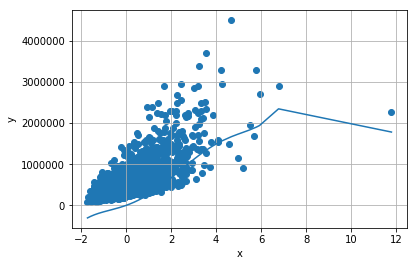

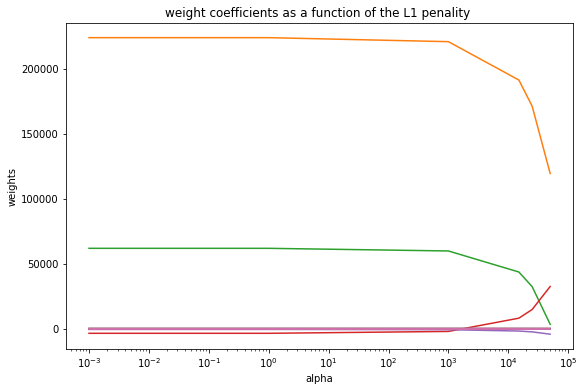

In [151]:
# question - 2.7
#16th order polynomial regression using sckit-learn Lasso
''' i have tried with alpha as 10, 1, 0.1, 0.01, 0.001'''

PR_16_order_sklearnLasso_2_7()

In [32]:
# question - 3.1
# regression using sckit-learn Ridge

def sklearnRidge_3_1():
    bias = []
    bias1 = []
    bias2 =[]
    rate = 0.01
    for i in range(0, len(train_set3x)):
        bias.append(1)
    X1 = np.vstack((bias, train_set3x.T)).T
    from sklearn.linear_model import Ridge
    for i in range(0, len(test_set3x)):
        bias1.append(1)
    X1_test = np.vstack((bias1, test_set3x.T)).T
    for i in range(0, len(val_set3x)):
        bias2.append(1)
    X1_val = np.vstack((bias2, val_set3x.T)).T
    # fitting data using scikit learn ridge regression
    
    ridgereg = Ridge(alpha=rate, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto')
    ridgereg.fit(X1, train_set3y)
    predict_y = ridgereg.predict(X1)
    predict_y_test = ridgereg.predict(X1_test)
    predict_y_val = ridgereg.predict(X1_val)
    from sklearn.metrics import mean_squared_error
    
    # weight coefficients
    
    theta = ridgereg.coef_
    
    #calculting error on validation set, train set, test set
    errormy = mean_squared_error(train_set3y, predict_y)
    RMSEmy = np.sqrt(errormy)
    errortest = mean_squared_error(test_set3y, predict_y_test)
    RMSEtest = np.sqrt(errortest)
    errorval = mean_squared_error(val_set3y, predict_y_val)
    RMSEval = np.sqrt(errorval)
    error_val = cost_General(theta, val_set3x, val_set3y)
    RMSE_val = np.sqrt(error_val)
    error_train = cost_General(theta, train_set3x, train_set3y)
    RMSE_train = np.sqrt(error_train)
    error_test = cost_General(theta, test_set3x, test_set3y)
    RMSE_test = np.sqrt(error_test)
    
    print("third Question - 3 -1 : sklearn Ridge")
    print("weights after optimization is %s " % (theta) )
    
    #calculating coefficients for diffreent L2 penalty
    
    alphas = [8000, 6000, 3000, 1000, 100, 10, 0.01, 0.000001]
    coefs = []
    errors = []
    for a in alphas:
        ridgereg = Ridge(alpha=a, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, random_state=None, solver='auto')
        ridgereg.fit(X1, train_set3y)
        coefs.append(ridgereg.coef_)
 
        
    #plotting weight coefficients as a function of the L2 penality
    
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('weight coefficients as a function of the L2 penality ')
    plt.axis('tight')
    print("Train Set : RMSE after optimization  is %s" % (RMSEmy))
    print("Validation Set : RMSE after optimization  is  %s" % (RMSEval))
    print("Test Set : RMSE after optimization is  %s" % (RMSEtest))    
     
    

third Question - 3 -1 : sklearn Ridge
weights after optimization is [ 0.          0.829588    0.12064188 -0.23797342  0.27381719 -0.00490403
 -0.03259125 -0.90208183 -0.87124329] 
Train Set : RMSE after optimization  is 0.7259055195437729
Validation Set : RMSE after optimization  is  0.7162306748672973
Test Set : RMSE after optimization is  0.7276795935124108


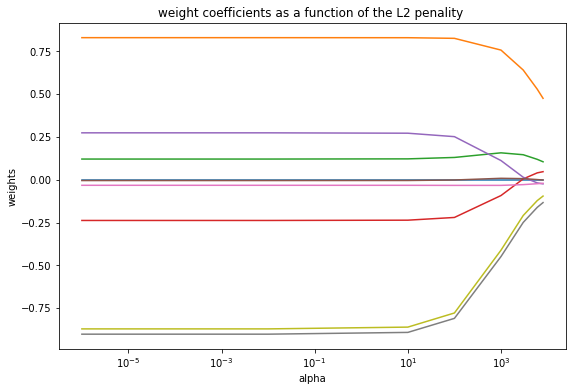

In [33]:
sklearnRidge_3_1()

In [41]:
# question - 3.2
# sckit-learn Lasso

def sklearnLasso_3_2():
    bias = []
    bias1 = []
    bias2 = []
    rate = 0.01
    from sklearn.linear_model import Lasso
    
    # fitting data with scikit learn Lasso regression
    
    lassoreg = Lasso(alpha=rate, copy_X=True, fit_intercept=True, max_iter=30000, normalize=False)
    for i in range(0, len(train_set3x)):
        bias.append(1)
    X1 = np.vstack((bias, train_set3x.T)).T
    lassoreg.fit(X1, train_set3y)
    for i in range(0, len(test_set3x)):
        bias1.append(1)
    X1_test = np.vstack((bias1, test_set3x.T)).T
    for i in range(0, len(val_set3x)):
        bias2.append(1)
    X1_val = np.vstack((bias2, val_set3x.T)).T
    from sklearn.metrics import mean_squared_error
    
    #weights using lasso
    theta = lassoreg.coef_
    
    predict_y = lassoreg.predict(X1)
    predict_y_test = lassoreg.predict(X1_test)
    predict_y_val = lassoreg.predict(X1_val)
    #to calculate cost using my function poly_cost_single_x()
    
    errormy = mean_squared_error(train_set3y, predict_y)
    RMSEmy = np.sqrt(errormy)
    errortest = mean_squared_error(test_set3y, predict_y_test)
    RMSEtest = np.sqrt(errortest)
    errorval = mean_squared_error(val_set3y, predict_y_val)
    RMSEval = np.sqrt(errorval)
    #RMSE of training set
    error_train = cost_General(theta, train_set3x, train_set3y)
    RMSE_train = np.sqrt(error_train)
    
    #RMSE of validation set
    
    error_val = cost_General(theta, val_set3x, val_set3y)
    RMSE_val = np.sqrt(error_val)
    
    #RMSE of test set
    
    error_test = cost_General(theta, test_set3x, test_set3y)
    RMSE_test = np.sqrt(error_test)
    
    print("Third Question - 3-2 :  sklearn Lasso ")
    print("weights after optimization is %s " % (theta) )
    print("Train Set : RMSE after optimization  is %s" % (RMSEmy))
    print("Validation Set : RMSE after optimization  is  %s" % (RMSEval))
    print("Test Set : RMSE after optimization is  %s" % (RMSEtest))   
        
    #calculating coefficients for diffreent L1 penalty
    
    alphas = [10000, 5000, 100, 0.1, 0.000001]
    coefs = []
    errors = []
    for a in alphas:
        lassoreg = Lasso(alpha=a, copy_X=True, fit_intercept=True, max_iter=100000, normalize=False)
        lassoreg.fit(X1, train_set3y)
        coefs.append(lassoreg.coef_)
        
    #plotting weight coefficients as a function of the L1 penality
    
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('weight coefficients as a function of the L1 penality ')
    plt.axis('tight')
    


Third Question - 3-2 :  sklearn Lasso 
weights after optimization is [ 0.          0.77996612  0.12673145 -0.11017037  0.14926819 -0.
 -0.02644834 -0.7964476  -0.75915863] 
Train Set : RMSE after optimization  is 0.7294829795512622
Validation Set : RMSE after optimization  is  0.7234505994699831
Test Set : RMSE after optimization is  0.730496879523252


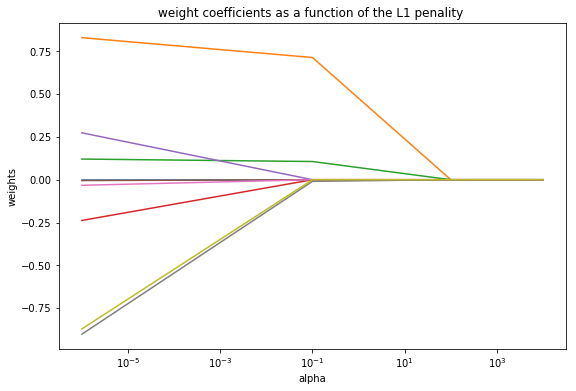

In [42]:
# question - 3.2
# sckit-learn Lasso regression

sklearnLasso_3_2()

In [69]:
# global variable to store weight coefficients

tensor_ridge = []
#tensor_lasso = []

In [110]:
#questio 3.3
# tensorflow Ridge regression

def tensorflow_ridge_3_3():
    bias_train = []
    m1 = len(train_set3x)
    learning_rate = 0.1
    
    #appending a column to X data
    
    for i in range(0, len(train_set3x)):
        bias_train.append(1)
    X1_train = np.vstack((bias_train, train_set3x.T)).T
    
    #reshaping the input y from array to matrix
    
    y_train = train_set3y.reshape(len(train_set3y), 1)
    X = tf.constant(X1_train, dtype = tf.float32, name = 'X')
    y = tf.constant(y_train, dtype = tf.float32, name = 'y')
    theta = tf.Variable(tf.random_normal((X1_train.shape[1], 1)), name="w")
    y_pred = tf.matmul(X, theta, name="Predictions")
    error = y_pred - y
    train_rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name="train_rmse")
    scale = 0.00001
    base_loss = tf.reduce_mean(tf.square( error), name = "loss")
    reg_loss = tf.reduce_sum(tf.square(theta))
    loss = tf.add(base_loss, scale/m1*reg_loss)
    
    gradients = 2/m1 * tf.add(tf.matmul(tf.transpose(X), error), scale*theta)
    training_op = tf.assign(theta, theta - learning_rate * gradients)
    with tf.Session() as sess:
        
        #initialising variables in tensor flow
        
        sess.run(tf.global_variables_initializer())
        for step in range(10000):
            sess.run(training_op)
        theta_train = sess.run(theta)
        rmse_train = sess.run(train_rmse)
        
        #reshaping the theta output from matrix to list and appending it to a list variable to use in graph
        
        theta_1 = theta_train.reshape(9, )
        
    tensor_ridge.append(theta_1)
    print("third question 3-4 : tensorflow lasso regression")
    print("optimizes weights %s " %(theta_train))
    print("Train set : RMSE after optimization is %s " %(rmse_train))
    
    #preparing and working on validation set
    
    bias_val = []
    m2 = len(val_set3x)
    for i in range(0, len(val_set3x)):
        bias_val.append(1)
    X1_val = np.vstack((bias_val, val_set3x.T)).T
    y_val = val_set3y.reshape(len(val_set3y), 1)
    X2 = tf.constant(X1_val, dtype = tf.float32, name = 'X2')
    y2 = tf.constant(y_val, dtype = tf.float32, name = 'y2')
    y2_pred = tf.matmul(X2, theta_train, name="Predictions2")
    error2 = y2_pred - y2
    val_rmse = tf.sqrt(tf.reduce_mean(tf.square(error2)), name="val_rmse")
    base_loss2 = tf.reduce_mean(tf.square( error2), name = "loss")
    reg_loss2 = tf.reduce_sum(tf.abs(theta_train))
    loss2 = tf.add(base_loss2, scale/m2*reg_loss2)
    with tf.Session() as sess:
        #initialising variables in tensor flow
        sess.run(tf.global_variables_initializer())
        rmse_val = sess.run(val_rmse)
    print("Validation set : RMSE after optimization is %s " %(rmse_val))
    
    # preparing and working on test set
    bias_test = []
    m3 = len(test_set3x)
    for i in range(0, len(test_set3x)):
        bias_test.append(1)
    X1_test = np.vstack((bias_test, test_set3x.T)).T
    y_test = test_set3y.reshape(len(test_set3y), 1)
    X3 = tf.constant(X1_test, dtype = tf.float32, name = 'X3')
    y3 = tf.constant(y_test, dtype = tf.float32, name = 'y3')
    y3_pred = tf.matmul(X2, theta_train, name="Predictions2")
    error3 = y3_pred - y3
    test_rmse = tf.sqrt(tf.reduce_mean(tf.square(error3)), name="test_rmse")
    base_loss3 = tf.reduce_mean(tf.square( error3), name = "loss")
    reg_loss3 = tf.reduce_sum(tf.abs(theta_train))
    loss3 = tf.add(base_loss3, scale/m3*reg_loss3)
    with tf.Session() as sess:
        
        #initialising variables in tensor flow
        
        sess.run(tf.global_variables_initializer())
        rmse_test = sess.run(test_rmse)
    print("Test set : RMSE after optimization is %s " %(rmse_test))
    

In [111]:
''' question 3.3 - Ridge regression tensorflow '''

tensorflow_ridge_3_3()

third question 3-4 : tensorflow lasso regression
optimizes weights [[ 2.0721292 ]
 [ 0.8295895 ]
 [ 0.12064105]
 [-0.23797715]
 [ 0.2738211 ]
 [-0.00490435]
 [-0.03259123]
 [-0.9020893 ]
 [-0.8712509 ]] 
Train set : RMSE after optimization is 0.7259055 
Validation set : RMSE after optimization is 0.71623045 
Test set : RMSE after optimization is 1.4635322 


(3.2737951410195092e-06,
 152727.94370520458,
 -1.0508050441741943,
 2.220840406417847)

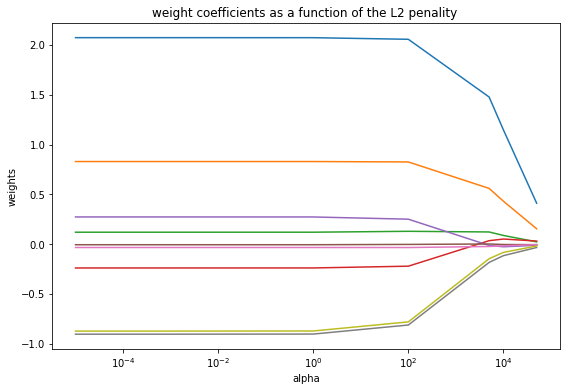

In [85]:
#plotting graph for Question 3.3 , Ridge tensorflow  
#print(tensor_ridge[0])
alphas = [50000, 10000, 5000, 100, 1, 0.001, 0.00001]
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, tensor_ridge)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('weight coefficients as a function of the L2 penality ')
plt.axis('tight')

In [114]:
tensor_lasso = []

In [127]:
#questio 3.4
# tensorflow lasso regression


def tensorflow_lasso_3_4():
    bias_train = []
    m1 = len(train_set3x)
    learning_rate = 0.1
    
    #appending a column to X data
    
    for i in range(0, len(train_set3x)):
        bias_train.append(1)
    X1_train = np.vstack((bias_train, train_set3x.T)).T
    
    #reshaping the input y from array to matrix
    
    y_train = train_set3y.reshape(len(train_set3y), 1)
    X = tf.constant(X1_train, dtype = tf.float32, name = 'X')
    y = tf.constant(y_train, dtype = tf.float32, name = 'y')
    theta = tf.Variable(tf.random_normal((X1_train.shape[1], 1)), name="w")
    y_pred = tf.matmul(X, theta, name="Predictions")
    error = y_pred - y
    train_rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name="train_rmse")
    scale = 0.00001
    base_loss = tf.reduce_mean(tf.square( error), name = "loss")
    reg_loss = tf.reduce_sum(tf.abs(theta))
    loss = tf.add(base_loss, scale/m1*reg_loss)
    gradients = 2/m1 * tf.add(tf.matmul(tf.transpose(X), error), scale*theta)
    training_op = tf.assign(theta, theta - learning_rate * gradients)
    with tf.Session() as sess:
        
        #initialising variables in tensor flow
        
        sess.run(tf.global_variables_initializer())
        for step in range(30000):
            sess.run(training_op)
        theta_train = sess.run(theta)
        rmse_train = sess.run(train_rmse)
        
        #reshaping the theta output from matrix to list and appending it to a list variable to use in graph
        
        theta_1 = theta_train.reshape(9, )
        tensor_lasso.append(theta_1)
    print("third question 3-4 : tensorflow lasso regression")
    print("optimizes weights %s " %(theta_train))
    print("Train set : RMSE after optimization is %s " %(rmse_train))
    
    #preparing and working on validation set
    
    bias_val = []
    m2 = len(val_set3x)
    for i in range(0, len(val_set3x)):
        bias_val.append(1)
    X1_val = np.vstack((bias_val, val_set3x.T)).T
    y_val = val_set3y.reshape(len(val_set3y), 1)
    X2 = tf.constant(X1_val, dtype = tf.float32, name = 'X2')
    y2 = tf.constant(y_val, dtype = tf.float32, name = 'y2')
    y2_pred = tf.matmul(X2, theta_train, name="Predictions2")
    error2 = y2_pred - y2
    val_rmse = tf.sqrt(tf.reduce_mean(tf.square(error2)), name="val_rmse")
    base_loss2 = tf.reduce_mean(tf.square( error2), name = "loss")
    reg_loss2 = tf.reduce_sum(tf.abs(theta_train))
    loss2 = tf.add(base_loss2, scale/m2*reg_loss2)
    with tf.Session() as sess:
        
        #initialising variables in tensor flow
        
        sess.run(tf.global_variables_initializer())
        rmse_val = sess.run(val_rmse)
    print("Validation set : RMSE after optimization is %s " %(rmse_val))
    
    #preparing and working on test set
    
    bias_test = []
    m3 = len(test_set3x)
    for i in range(0, len(test_set3x)):
        bias_test.append(1)
    X1_test = np.vstack((bias_test, test_set3x.T)).T
    y_test = test_set3y.reshape(len(test_set3y), 1)
    X3 = tf.constant(X1_test, dtype = tf.float32, name = 'X3')
    y3 = tf.constant(y_test, dtype = tf.float32, name = 'y3')
    y3_pred = tf.matmul(X2, theta_train, name="Predictions2")
    error3 = y3_pred - y3
    test_rmse = tf.sqrt(tf.reduce_mean(tf.square(error3)), name="test_rmse")
    base_loss3 = tf.reduce_mean(tf.square( error3), name = "loss")
    reg_loss3 = tf.reduce_sum(tf.abs(theta_train))
    loss3 = tf.add(base_loss3, scale/m2*reg_loss3)
    with tf.Session() as sess:
        
        #initialising variables in tensor flow
        
        sess.run(tf.global_variables_initializer())
        rmse_test = sess.run(test_rmse)
    print("Test set : RMSE after optimization is %s " %(rmse_test))
    

In [128]:
''' question 3.4 , Lasso regression with tensorflow '''

tensorflow_lasso_3_4()

third question 3-4 : tensorflow lasso regression
optimizes weights [[ 2.0721292 ]
 [ 0.8295895 ]
 [ 0.12064106]
 [-0.23797715]
 [ 0.2738211 ]
 [-0.00490434]
 [-0.03259123]
 [-0.9020893 ]
 [-0.8712509 ]] 
Train set : RMSE after optimization is 0.7259055 
Validation set : RMSE after optimization is 0.71623045 
Test set : RMSE after optimization is 1.4635322 


(3.2737951410195092e-06,
 152727.94370520458,
 -1.0508002251386643,
 2.2208401769399644)

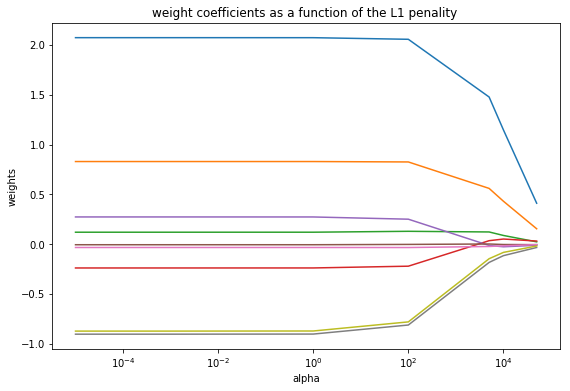

In [130]:
#plotting graph for Question 3.4 , lasso tensorflow  

alphas = [50000, 10000, 5000, 100, 1, 0.001, 0.00001]
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, tensor_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('weight coefficients as a function of the L1 penality ')
plt.axis('tight')